RESHMA R
TASK 1 - Prediction using Supervised ML
PROBLEM STATEMENT-Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?
Python language used.
 

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [46]:
marks = pd.read_csv('http://bit.ly/w-data')
marks.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [47]:
datas.isnull == True


False

There is no null value in the Dataset so we can now visualize our Data.

In [48]:
datas.shape

(25, 2)

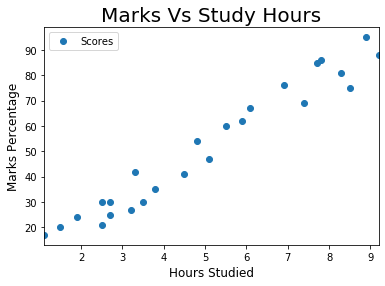

In [49]:
#plotting Hours vs. Percentage

marks.plot(x = 'Hours',y = 'Scores', style = 'o')
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

From the graph we can clearly observe a strong linear relationship between the 2 variables
and we can imagine a straight trend line making them ideal for Linear Regression application.

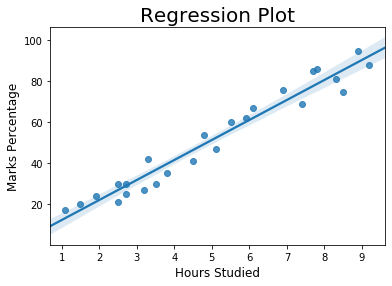

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [50]:
sns.regplot(x= marks['Hours'], y= marks['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(marks.corr())


It is confirmed that the variables are positively correlated

Training the Model
1) Splitting the Data

In [51]:
# Defining X and y from the Data
X = marks.iloc[:, :-1].values  
y = marks.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

2) Fitting the Data into the model

In [52]:

regression = LinearRegression()
regression.fit(train_X, train_y)
print("---------Model Trained---------")

---------Model Trained---------


Predicting the Percentage of Marks

In [53]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


Comparing the Predicted Marks with the Actual Marks

In [54]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


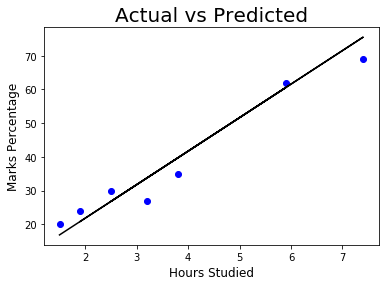

In [55]:
#Visually Comparing the Predicted Marks with the Actual Marks
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

Model Evaluation
As we are dealing with numerical data, Mean Absolute Error 
would be a great choice for a metric for evaluating the Linear Regression model.

In [56]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


In [57]:
hours = [9.25]
answer = regression.predict([hours])
print("If the student studies for 9.25 hours, he is expected to score {}".format(round(answer[0],3)))

If the student studies for 9.25 hours, he is expected to score 93.893


Conclusion
we can conclude that if a student studies for 9.25 hours/day, he is expected to score 93.893 marks !'